# 분석을 할 때는 class화 또는 작업 마다의 함수화를 시켜주는것이 좋습니다. 

- 변수뒤에 id_ -> 1회성 변수 만들 때
- __init__ -> private 메소드 또는 멤버 변수 만들 때 사용
- bin은 내가 봐서 잘 판단해서 개수를 설정해 주어야 한다.

In [1]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path= housing_path)
  housing_tgz.close()
fetch_housing_data()

In [2]:
# 다운받은 CSV를 pandas 데이터 프레임으로 불러오기
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


데이터를 받고 제일 처음해야하는작업
- 데이터 의미 파악
    - 어떤것이 feature이고 어떤것이 target인가?
    - target은 항상 한개가 아니다

- 데이터의 특징파악
    - 상관관계
    - 데이터의 타입확인(dtype)1
    - 등등등

- 데이터 프레임의 정보를 확인해야 한다.
    - 데이터의 전반적인 개요를 확인을 할 수 있다.
    - 개요를 토대로 분석을 어떻게 할 지 계획을 세울 수도 있다.

In [4]:
# DataFrame상에서 object는 보통 str, text 형태이다.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- 머신러닝은 정규분포형태의 데이터가 좋다.
- std: 표준편차 ( 줄이는것이 좋다.)(작은게 좋다,)


# 숫자를 보면 힘드니 시각화를 통해서 봅시다.

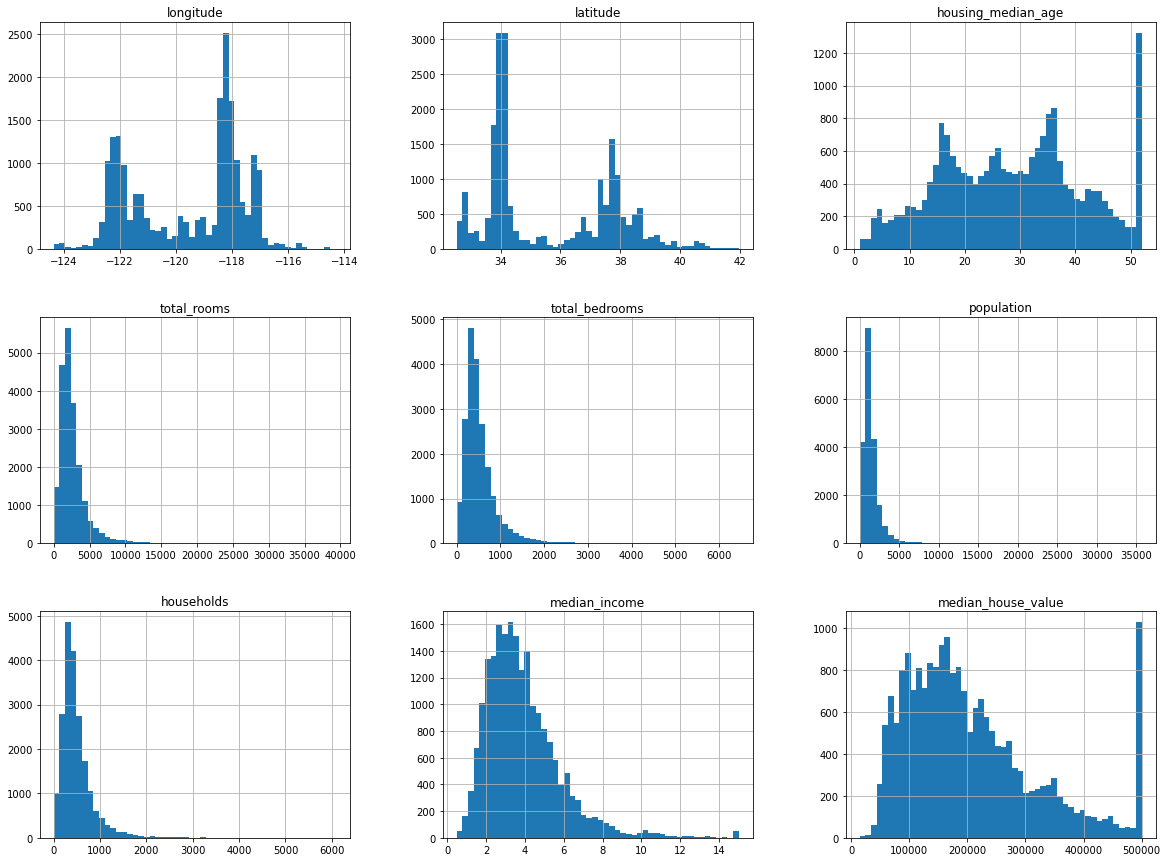

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# 히스토그램을 본다는 이야기는 구간별 빈도수를 본다는 이야기이다. -> 데이터가 어디에 많이 몰려있는지 볼 수 있다.
# bins = 데이터를 50개씩 끊어준다. 1~49 1구간
# 아래의 그래프들처럼 한쪽으로 편중되어 있을때 log를 씌워서 데이터를 가운데로 옮길수도 있다.
# housing_median_age같은 데이터는 우측에 있는값은 어느정도 수치를 넘어간 값은 저것을 통일시켰다고 볼 수 있다.
#  - 이상치로 삼지 않아도 되는데 데이터를 수집한 사람이 이상치처럼 만들어 놓은것이다.(이상치는 아니지만 지금은 어쩘수 없이 사용해야 한다.)
housing.hist(bins=50, figsize=(20, 15))
plt.show()

- 최대한 많은 데이터를 수집하는게 중요하다 기준: 최소한 10만개(row) ( 분석하고자 하는 주제에 대해서 )
- 하이퍼 파라미터: 개발자가 직접 넣어주어야 하는 파라미터
- 데이터 스누핑 편향: 과대적합 신호


- 테스트 세트를 만들기 위한 분석
    - 테스트 세트를 만드는 이유
        - 1.일반화 오차를 줄이기 위해
            - 일반화 오차: 가지고 있는 모든 데이터로 훈련을 하는 바람에 실제 데이터에서 오차가 일어나는 현상   
        - 2.신뢰성 있는 모델 생성

#  numpy 100제 풀기

In [7]:
# 사이킷 런에 기능이 좋은 데이터 스플리터가 있지만  직접 만들어 보자
# 1. 램덤으로 쪼개기
import numpy as np
# Pandas 전용 함수
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 데이터 개수 만큼 무작위 인덱스를 가진 리스트를 생성
    test_set_size = int(len(data) * test_ratio) # 지정한 비율(test_ratio)대로 테스트 세트의 크기 구하기
    
    test_indices = shuffled_indices[ : test_set_size] # 원본 데이터에서 test_set_size 만큼 잘라냄
    train_indices = shuffled_indices[ test_set_size : ] # 나머지 데이터는 훈련 세트로 사용
    
    # data : pandas의 DataFrame
    return data.iloc[train_indices], data.iloc[test_indices] # 데이터 프레임 리턴

In [8]:
df_train, df_test = split_train_test(housing, 0.2)

print(len(df_train), len(df_test))

16512 4128


- 랜덤으로 셔플링하고 잘랐는데, 여기에는 큰 단점이 있다.
    - 랜덤으로 셔플링을 무한히 하게 되면 모델은 언젠가는 모든 데이터를 봐버린다 => 데이터 스누핑 편향(과대적합)이 일어날 수 있다
    - 보완하기 위한 방법으로 랜덤 시드를 고정하는 방법이 있다. np.random.seed(42)
    - 하지만 random seed에도 단점은 있다.
        - 장점: 언제나 똑같은 랜덤값을 활용하기 때문에 동일한 데이터에 대해 안정적인 셔플링이 가능
        - 단점: 데이터가 추가되거나 삭제되면 시드가 소용이 없다. (데이터 추가/삭제가 잦은 데이터 SET이라면 랜덤시드는 불안정한 방법이 된다.)



- 랜덤의 단점을 해결하기 위한 방법
    - 1. 해쉬값 또는 고유값을 활용해서 잘라내는 방법.
        - 셔플링이 아닌, 훈련, 테스트 데이털르 일정하게 관리할 수 있게 해준다.
        - 각 데이터 마다 고유값이 존재하는 경우 사용하면 좋다. (단, 인덱스는 금지 (인덱스는 바뀔 가능성이 있다.))

In [9]:
from zlib import crc32

# 한번 train은 계속 train 한번 test는 계속 test
# 이 함수는 True False를 리턴한다 True = test, False = train 이런식으로 분류를 한다.
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32



def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    
    # apply : Series에서 사용할 집계함수를 사용자가 직접 정의할 수 있도록 함.
    # ids에 test_set_check함수를 적용시켜주는 작업.
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio ))
    
    # ~in_test_set: False인 Data만, in_test_set: True인 Data만 뽑겠다.
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
# id로 활용할만한 컬럼이 뭐가 있을까요?
# 유일하면서도 몇 백년 간은 바뀌지 않을 데이터인 위경도를 사용해 보자.
housing_with_id = housing.reset_index()
# longitude의 소수점 4번째까지 자리까지 쓰려고 1000을 곱해준다.
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


- 대표적인 머신러닝 라이브러리인 사이킷런 활용하기 pip install sckilt-learn

- 사이킷런은 train_test_split 함수를 지원

In [12]:
# 사이킷런을 활용한 랜덤 사용
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size= 0.2, random_state=42) # random_state : random seed

구간과 계층은 같은 의미이다.
- 계층적 분할 수행하기
 - median_income 데이터는 'median_house_value' 예측에 대해 지대한 영향을 미치는 데이터 입니다.
 - 이데이터를 랜덤으로 집어 넣어서 의미 없게 사용하기 보다는 ***계층을 분할*** 해서 train, test 데이터에 일정하게 골고루 들어가게 해 주는 것이 좋다.

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
# 0.0 ~ 1.5 사이 값은 1번 구간, 1.5 ~ 3.0은 2번 구간
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels=[1, 2, 3, 4 , 5])

housing["income_cat"].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

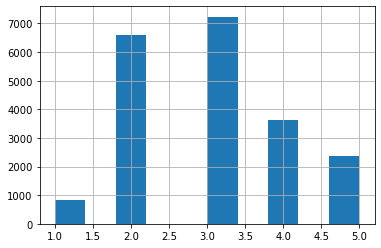

In [15]:
housing["income_cat"].hist()

- 사이킷 런에서 섞고, 구간 비율을 유지하면서 잘라내는 방법 'StratifiedShuffleSplit 활용

#### n.split

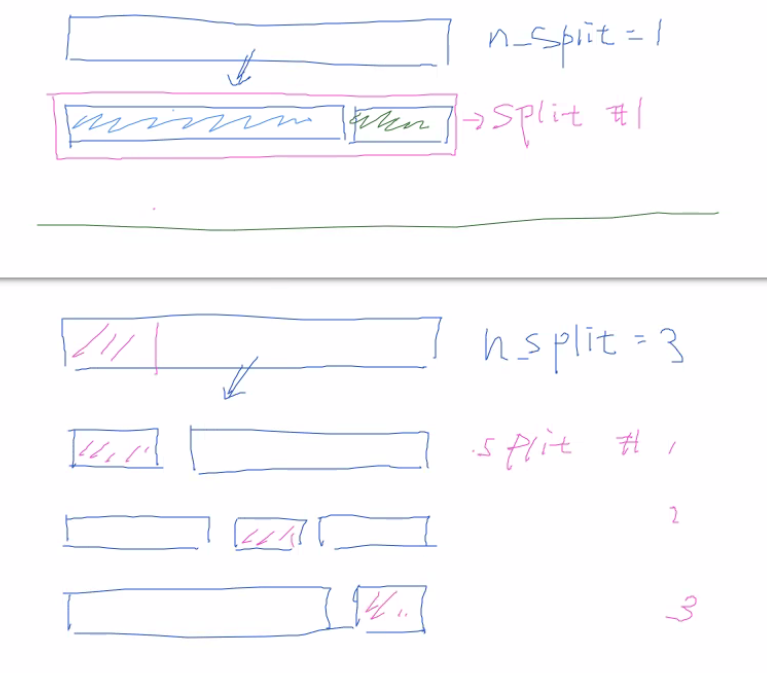

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits= 계층의 개수
split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

KeyError: 'income_cat'

In [18]:
# 테스트 세트에서 median_income 비율 확인
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [19]:
# 계층 샘플링이 오류율이 더 적게 나온다.

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체": income_cat_proportions(housing),
    "계층 샘플링": income_cat_proportions(strat_test_set),
    "무작위 샘플링": income_cat_proportions(test_set),
}).sort_index()
compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100
compare_props

,전체,계층 샘플링,무작위 샘플링,무작위 샘플링 오류율,계층 샘플링 오류율
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [21]:
# 원래대로 돌려 놓기
# 구간 정보는 데이터를 나누기 위해서만 필요하기 때문에 드롭시켜준다.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis =1, inplace=True)

# 시각화 진행하기

In [22]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


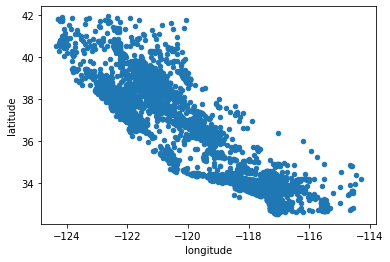

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

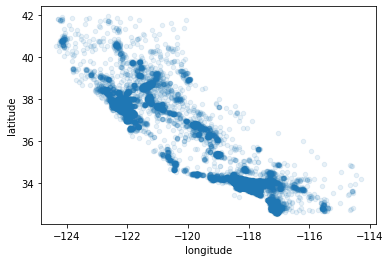

In [24]:
# 투명도 하나만으로도 많은걸 알 수 있다.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.1)
plt.show()

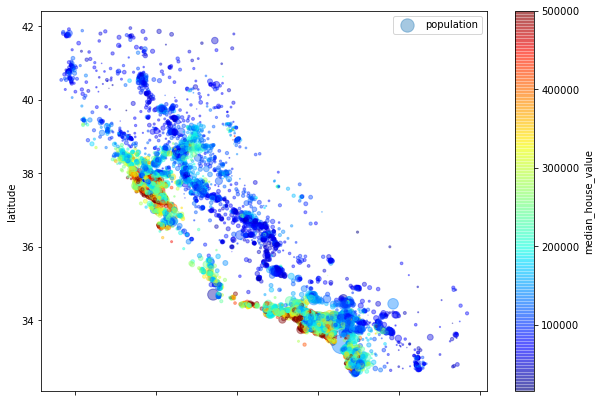

In [25]:
# 원의 크기: 인구수를 의미 - 인구수가 많으면 원이 커진다.
# colorbar를 이용해서 가격이 높아질 수록 붉은색으로
# s = size

housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
            alpha= .4,
            s= housing["population"] / 100, # 점의 크기
            label= "population", # 레이블링
            c = "median_house_value", # 컬러맵 기준
            cmap= plt.get_cmap("jet"), # 컬러맵 테마
            colorbar=True,
            figsize=(10, 7)) # 컬러바 표시 여부
plt.legend()
plt.show()

In [26]:
# Download the California image
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x21370479280>)

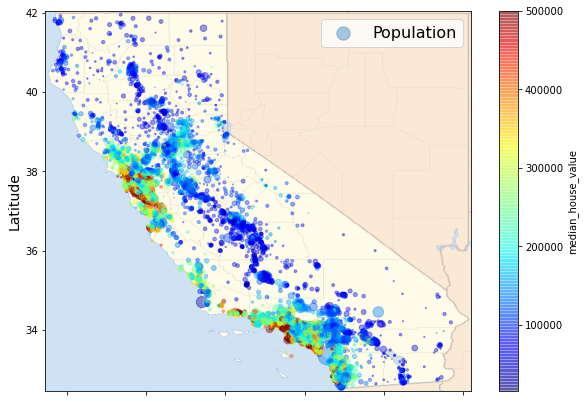

In [27]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                  
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

# 상관관계 알아보기

- 머신러닝에서 사용되는 모든 데이터는 실수값을 활용합니다.
- 정수값도 사용되나, 정수값은 보통 카테고리 선정에 활용 된다.
- 일반적으로 연속적이 나오면: 실수, 독립적이 나오면: 정수


- 상관관계: X가 증가했을 때, Y가 얼마만큼 증가 또는 감소 하는지 ( 수학적으로 기울기)

In [31]:
# median_house_value에 대한 다른 특성들의 상관관계 확인하기
# 모든 특성간의 상관 계수 파악 -Stand correlation Coefficient ( 표준 상관 관계 )
corr_matrix = housing.corr()

# Y= median_house_value, 출력으로 나오는것들이 X
# median_house_value에 대해 어느정도 연관이 어느정도 있는지 나타내어 주는 식 (% 개념이 아니다.)
# median_house_value가 1증가할 떄 변화하는 값
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

피어슨 상관계수 ($r$) 위의 식


- 상관 계수의 절대값이 0 ~ 0.3 이면 약한 상관 계수 ( 연관이 없는 관계 )
- 상관 계수의 절대값이 0.3 ~ 0.7 이면 보통의 상관 계수 ( 약간의 연관이 있는 관계 )
- 상관 계수의 절대값이 0.7 이상이면 매우 강한 상관 계수 ( 강력하게 영향을 미치는 관계 )


- 상관 계수가 낮더라도 연관이 있다고 생각된다면 사용하는것이 좋다.

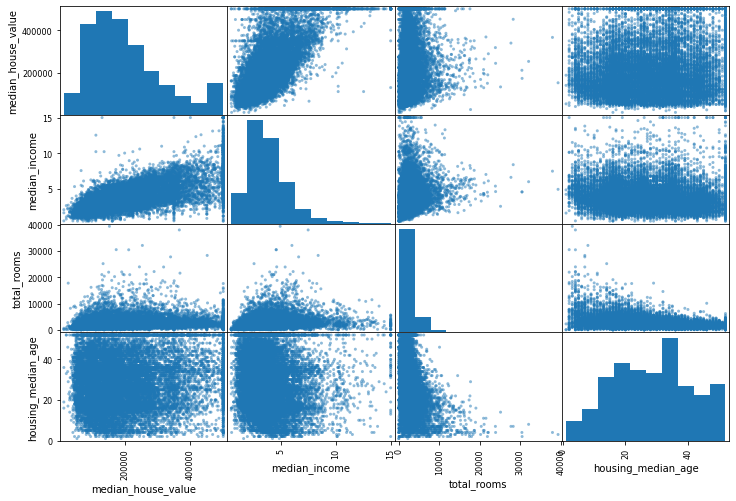

In [34]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

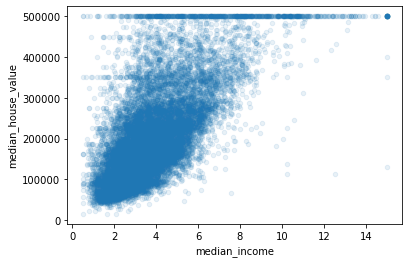

In [36]:
# scatter를 찍어봤을때 나오는 수평선으로 이 데이터셋이 좋은지 안 좋은지 판단이 가능하다.
# 이 그래프는 보면 중간에 값을 통일한게 보이기 떄문에 이 데이터는 좋은 데이터가 아니다.

housing.plot(kind="scatter", x= "median_income", y="median_house_value", alpha=0.1)

# 특성 조합

- 조건들을 조합해서 상관관계의 아까보다 좀 더 높은 절대값을 가지는 컬럼을 구했다.
- 이것들을 구하기 위해서는 전문가의 지식이 필요한 경우가 많다.

In [40]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"] # 가구 당 방 개수
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"] # 방당 침실 수
housing["population_per_houserhold"] = housing["population"] / housing["households"] # 가구당 인구수

In [41]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_household          0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_houserhold   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_room           -0.259984
Name: median_house_value, dtype: float64

# Day01 ----------------------------------------------